## Analysis of Genetic Algorithm Hyperparameters

### Step1: Function Visualization

In [75]:
%matplotlib notebook

from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

def eggholder_func(x,y):
    return (-(y+47.0)*np.sin(np.sqrt(abs(x/2.0+(y+47.0)))))-x*np.sin(np.sqrt(abs(x-(y+47.0))))

x = np.linspace(-512,512,200)
y = np.linspace(-512,512,200)

X,Y = np.meshgrid(x,y)
Z = eggholder_func(X,Y)

# plt.rcParams["figure.figsize"] = [8,5]
# fig = plt.show()
# ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 200)
# ax.set_xlabel('x')
# ax.set_ylabel('y')

#### Contour map of the function

<IPython.core.display.Javascript object>


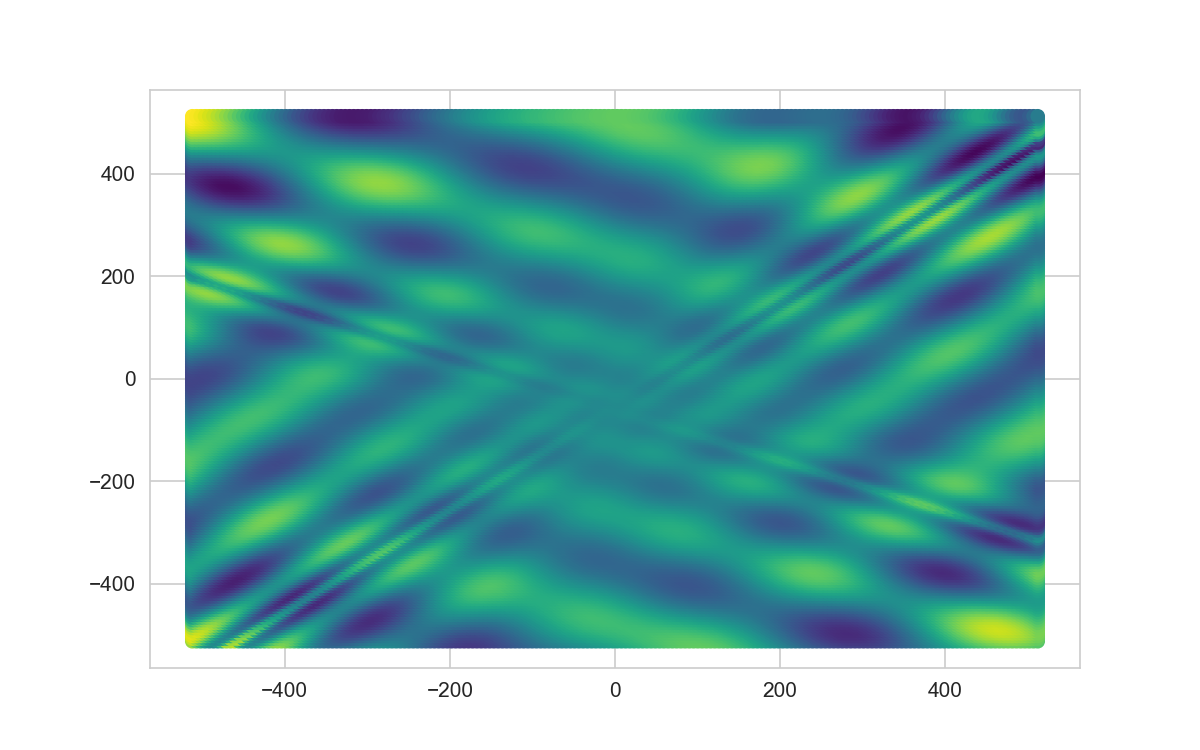

In [76]:
cm = plt.cm.get_cmap('viridis')
plt.scatter(X, Y, c=Z, cmap=cm)
plt.show()

#### Contour map of the function with labels for intuitive understanding

<IPython.core.display.Javascript object>


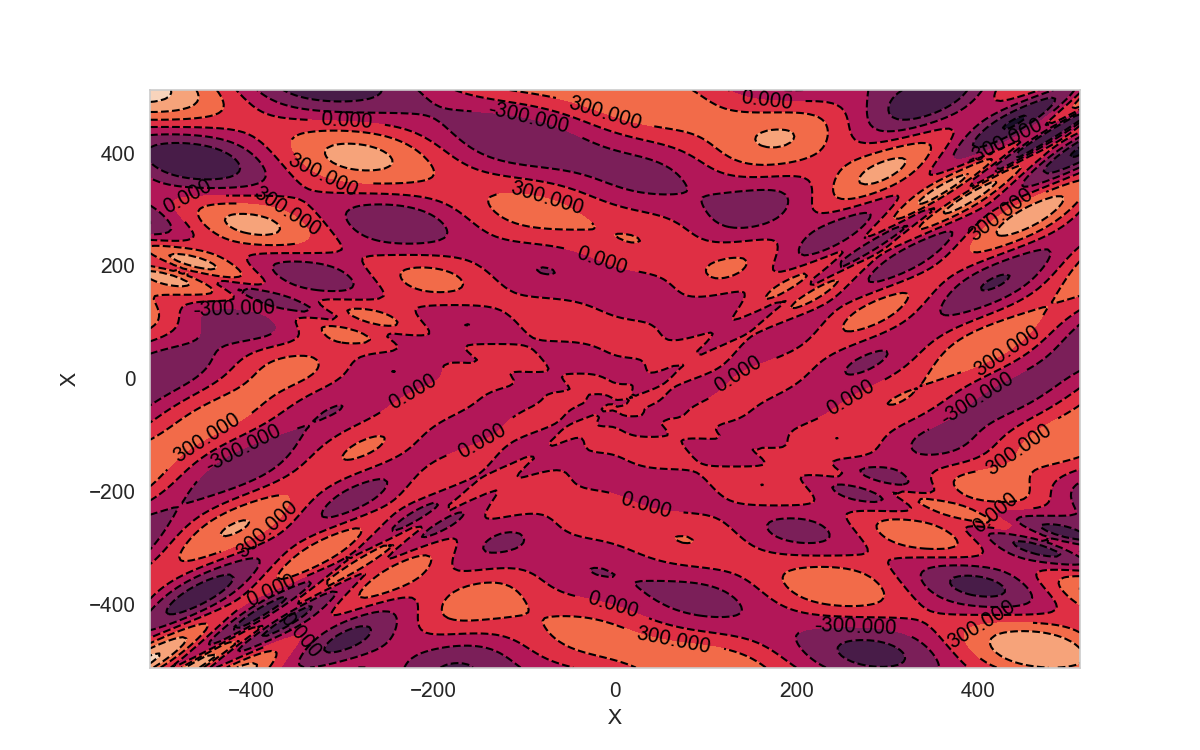

In [77]:
cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X, Y, Z, )
plt.xlabel('X')
plt.ylabel('X')
plt.show()

### Step 2: Genetic Algorithm parameters

In [121]:
import random
from deap import tools
from deap import base
from deap import creator
import array
import elitism
import seaborn as sns


DIMENSIONS=2

BOUND_LOW,BOUND_UP=-512.0,512.0

def randomFloat(low,up):
    return [random.uniform(l,u) for l, u in zip([low]*DIMENSIONS, [up]*DIMENSIONS)]

def eggholder(individual):
    x = individual[0]
    y = individual[1]
    return (-(y+47.0)*np.sin(np.sqrt(abs(x/2.0+(y+47.0)))))-x*np.sin(np.sqrt(abs(x-(y+47.0)))),


#Self not used
creator.create("FitnessMin",base.Fitness,weights=(-1.0,))
creator.create("Individual",list,fitness=creator.FitnessMin)

### Step 3: Genetic Flow

#### Creation of GA class allows for comparing results with different parameters

In [122]:
class GA:
    
    def __init__(self,POPULATION_SIZE = 500, P_CROSSOVER = 0.9, P_MUTATION = 0.1, MAX_GENERATIONS = 500,
                 HALL_OF_FAME_SIZE=30,CROWDING_FACTOR = 20.0):
    
        self.pop_size = POPULATION_SIZE
        self.pcxp = P_CROSSOVER
        self.pmut = P_MUTATION
        self.maxgen = MAX_GENERATIONS
        self.hofsize = HALL_OF_FAME_SIZE
        self.crowdfactor = CROWDING_FACTOR
        
        self.toolbox = base.Toolbox()


        self.toolbox.register("attrfloat",randomFloat,BOUND_LOW,BOUND_UP)
        self.toolbox.register("individualCreator",tools.initIterate,creator.Individual,self.toolbox.attrfloat)
        self.toolbox.register("populationCreator",tools.initRepeat,list,self.toolbox.individualCreator)

        self.toolbox.register("evaluate",eggholder)

        self.toolbox.register("select",tools.selTournament,tournsize=2)
        self.toolbox.register("mate",tools.cxSimulatedBinaryBounded,low=BOUND_LOW,up=BOUND_UP,eta=self.crowdfactor)
        self.toolbox.register("mutate",tools.mutPolynomialBounded,low=BOUND_LOW,up=BOUND_UP,eta=self.crowdfactor,indpb=1.0/DIMENSIONS)

    def ga_execute(self):
        
        self.population = self.toolbox.populationCreator(self.pop_size)
    
        self.stats = tools.Statistics(lambda ind:ind.fitness.values)
        self.stats.register("min",np.min)
        self.stats.register("mean",np.mean)
    
        self.hof = tools.HallOfFame(self.hofsize)
    
        self.population,self.logbook = elitism.eaSimpleWithElitism(self.population,self.toolbox,cxpb=self.pcxp,mutpb=self.pmut,
                                                                   ngen=self.maxgen,stats=self.stats,halloffame=self.hof,verbose=False)
    
        self.best = self.hof.items[0]
    
        print("-- Best Individual = ", self.best)
        print("-- Best Fitness = ", self.best.fitness.values[0])

        self.minFitnessValues, self.meanFitnessValues = self.logbook.select("min", "mean")

        sns.set_style("whitegrid")
        plt.plot(self.minFitnessValues, color='red')
        plt.plot(self.meanFitnessValues, color='green')
        plt.xlabel('Generation')
        plt.ylabel('Min / Average Fitness')
        plt.title('Min and Average fitness over Generations')

        plt.show()

    def get_values(self):
        
        return self.hof
        

-- Best Individual =  [485.30565495218275, 440.8711444121587]
-- Best Fitness =  -947.4566315304864


<IPython.core.display.Javascript object>


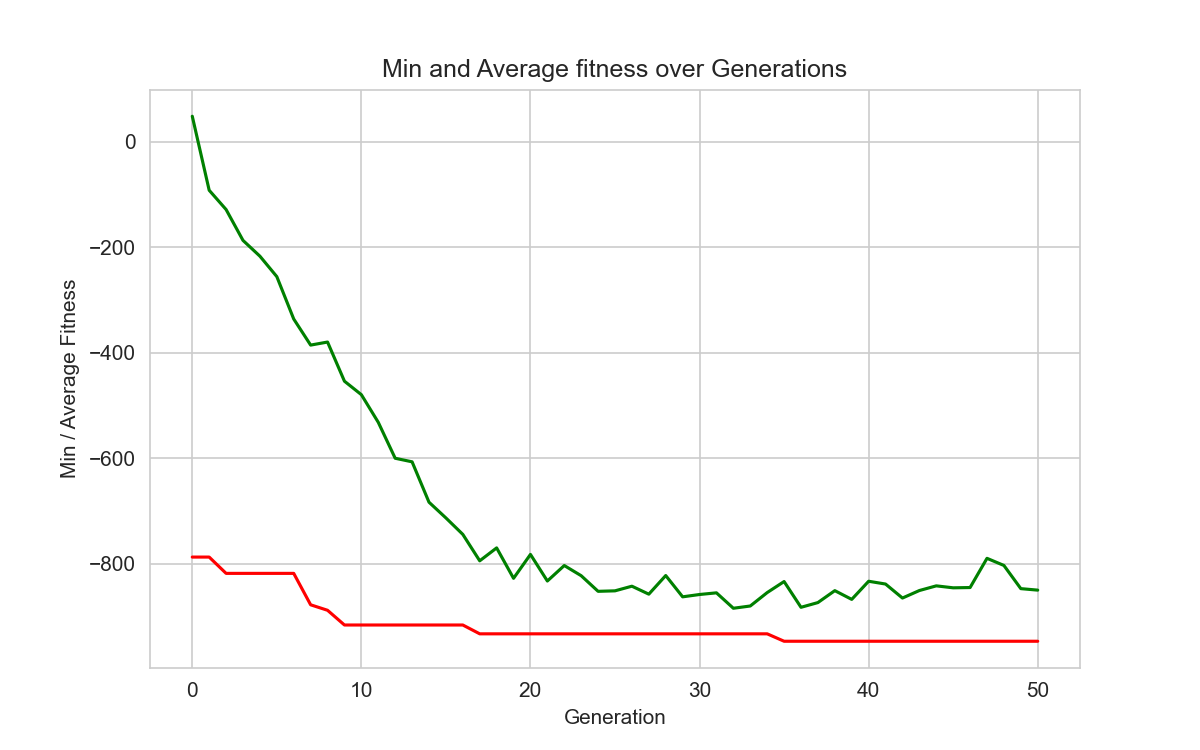

In [123]:
ga1 = GA(POPULATION_SIZE=100,MAX_GENERATIONS=50,HALL_OF_FAME_SIZE=75,P_MUTATION=0.5)
ga1.ga_execute()

### Step 4: Visualization of the Optimization process

#### Each generation's best individual is selected for visualizing the convergence

In [118]:
"""Yet"""
hl = ga1.get_values()
x_list=[]
y_list=[]
z_list=[]
for i in range(len(hl)):
    x_list.append(hl.items[i][0])
    y_list.append(hl.items[i][1])
    z_list.append(hl[i].fitness.values[0])

cp = plt.contour(X, Y, Z, colors='black', linestyles='dashed', linewidths=1)
plt.clabel(cp, inline=1, fontsize=10)
cp = plt.contourf(X, Y, Z, )
plt.scatter(x_list,y_list,color='b')
plt.xlabel('X')
plt.ylabel('X')
plt.show()